<a href="https://colab.research.google.com/github/alorentiar/DeepTransferLearning/blob/main/Copy_of_GDG_Transfer_Learning_Mode_1_for_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEEP TRANSFER LEARNING
Pemanfaatan Deep Transfer Learning Mode 1

Video lengkapnya ada di https://www.youtube.com/watch?v=SOLNS4mXTD0&t=80s

Kelas-kelas data training ImageNet https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

In [ ]:
#Import library yang dibutuhkan
from keras.applications.vgg16 import VGG16

#Deklarasikan model yang akan dipakai
model = VGG16()

#Tampilkan layer-layer model VGG16
model.summary()

553476096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

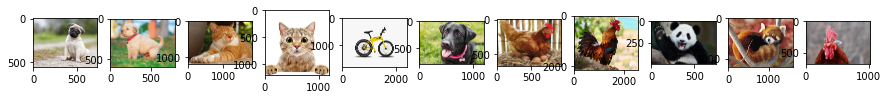

(11, 224, 224, 3)


In [ ]:
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

urls=[]
urls.append("https://post.healthline.com/wp-content/uploads/2020/08/3180-Pug_green_grass-732x549-thumbnail-732x549.jpg")
urls.append("https://static.toiimg.com/thumb/msid-60132235,imgsize-169468,width-800,height-600,resizemode-75/60132235.jpg")
urls.append("https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/other/cat_relaxing_on_patio_other/1800x1200_cat_relaxing_on_patio_other.jpg")
urls.append("https://i.guim.co.uk/img/media/26392d05302e02f7bf4eb143bb84c8097d09144b/446_167_3683_2210/master/3683.jpg?width=1200&height=1200&quality=85&auto=format&fit=crop&s=49ed3252c0b2ffb49cf8b508892e452d")
urls.append("https://media.wired.com/photos/61afb905d184762c75e00411/master/pass/Gear-Jackbrabbit-Bike-Yellow-top.jpg")
urls.append("https://cdn.mos.cms.futurecdn.net/ZvueiLL2vdwoHWHjCRuQCW-1200-80.jpg")
urls.append("https://images.theconversation.com/files/239356/original/file-20181004-52660-1fosymz.jpg?ixlib=rb-1.1.0&rect=121%2C5%2C3214%2C2309&q=45&auto=format&w=926&fit=clip")
urls.append("https://www.thesun.co.uk/wp-content/uploads/2019/09/NINTCHDBPICT000492607142-e1567357146264.jpg")
urls.append("https://asset.kompas.com/crops/ncgvDkq11ovx_624dxbv483x_iY=/0x0:648x432/750x500/data/photo/2021/10/05/615c371c61b81.jpg")
urls.append("https://wallpaperaccess.com/full/3396763.jpg")
urls.append("https://www.thehappychickencoop.com/wp-content/uploads/2019/01/chicken-and-hen.jpg")

imgs=[]
plt.figure(figsize=(15,6))
for u in range(0,len(urls)):
  r = requests.get(urls[u], stream=True) #Download
  img = np.array(Image.open(r.raw))  #Konversi ke NP Array
  plt.subplot(1,len(urls),u+1) #Menampilkan ke matplotlib
  plt.imshow(img) #Menampilkan ke matplotlib
  img = cv2.resize(img, (224,224)) #Resize sesuai input VGG 16
  imgs.append(img) #Kumpulkan semua image yang telah di preproses ke imgs
plt.show() #Menampilkan ke matplotlib
imgs = np.array(imgs) #Konversi ke Np Array 
print (imgs.shape) #Debuging (Apakah shape-nya benar?)

VGG 16 memiliki target 1000 kelas 
https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

Kelas anjing: 151 (Chihuahua) - 268 (Mexican hairless)

Kelas kucing: 281 (tabby cat) - 287 (lynx) 



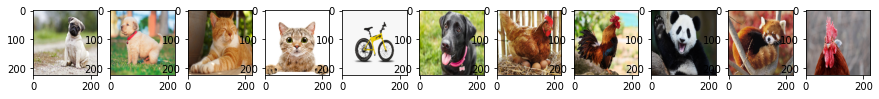

Anjing
Anjing
Kucing
Kucing
Lainya
Anjing
Lainya
Lainya
Lainya
Lainya
Lainya


In [ ]:
plt.figure(figsize=(15,6))
for i in range(0,len(urls)):
  plt.subplot(1,len(urls),i+1) #Menampilkan ke matplotlib
  plt.imshow(imgs[i]) #Menampilkan ke matplotlib

plt.show() #Menampilkan ke matplotlib

yh = model.predict(imgs)
for i in range(len(urls)):
  if(np.argmax(yh[i]) >= 151 and np.argmax(yh[i])<=268 ):
      print("Anjing")
  elif(np.argmax(yh[i]) >= 281 and np.argmax(yh[i])<=287 ) :
      print("Kucing")
  else:
      print("Lainya")

In [ ]:
yh.shape

(11, 1000)

In [ ]:
yh[0]

array([2.78243650e-08, 1.70126102e-09, 6.96373448e-08, 1.58617084e-08,
       2.42331453e-07, 2.30675159e-08, 9.63263957e-09, 1.73726653e-06,
       3.31742967e-06, 1.15562408e-07, 7.50505649e-07, 1.08360794e-07,
       1.60985536e-07, 5.04050922e-06, 2.34852607e-07, 3.02262720e-07,
       9.21973651e-07, 1.27420094e-06, 2.87219291e-06, 8.04473856e-08,
       2.36368533e-06, 2.55564851e-06, 6.84615458e-08, 1.46237498e-05,
       1.65307083e-05, 7.95536792e-08, 9.91455167e-08, 1.32853488e-08,
       3.80824261e-08, 4.90541510e-08, 2.01639523e-06, 2.23579406e-07,
       7.39075176e-07, 1.40066092e-07, 6.15732415e-06, 4.45782490e-07,
       6.66580945e-07, 1.82034989e-06, 3.60176068e-06, 1.99241986e-05,
       1.92234097e-06, 2.82344104e-06, 2.71109275e-06, 8.98743110e-07,
       2.05926335e-06, 5.99977784e-06, 3.73771650e-06, 3.13370174e-06,
       1.90304945e-06, 1.11065248e-07, 4.38699885e-08, 1.15261933e-07,
       1.76754938e-07, 2.21204779e-08, 1.04013353e-07, 4.68761492e-08,
      

In [ ]:
np.argmax(yh[0])

254